This Jupyter Notebook contains code examples for predictive modeling using a Linear Regression model and an XGBoost Regressor. The notebook aims to showcase the steps involved in data preprocessing, model training, evaluation, and visualization using Python's popular data science libraries.

In [1]:
#Installing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error
import seaborn as sns
from xgboost import XGBRegressor

In [2]:
df = pd.read_csv("House Price India.csv")  # Readiing the dataset

In [3]:
df      # Checking the dataset

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14616,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14617,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14618,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000


In [4]:
df.info()  # Printing the data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

<AxesSubplot: >

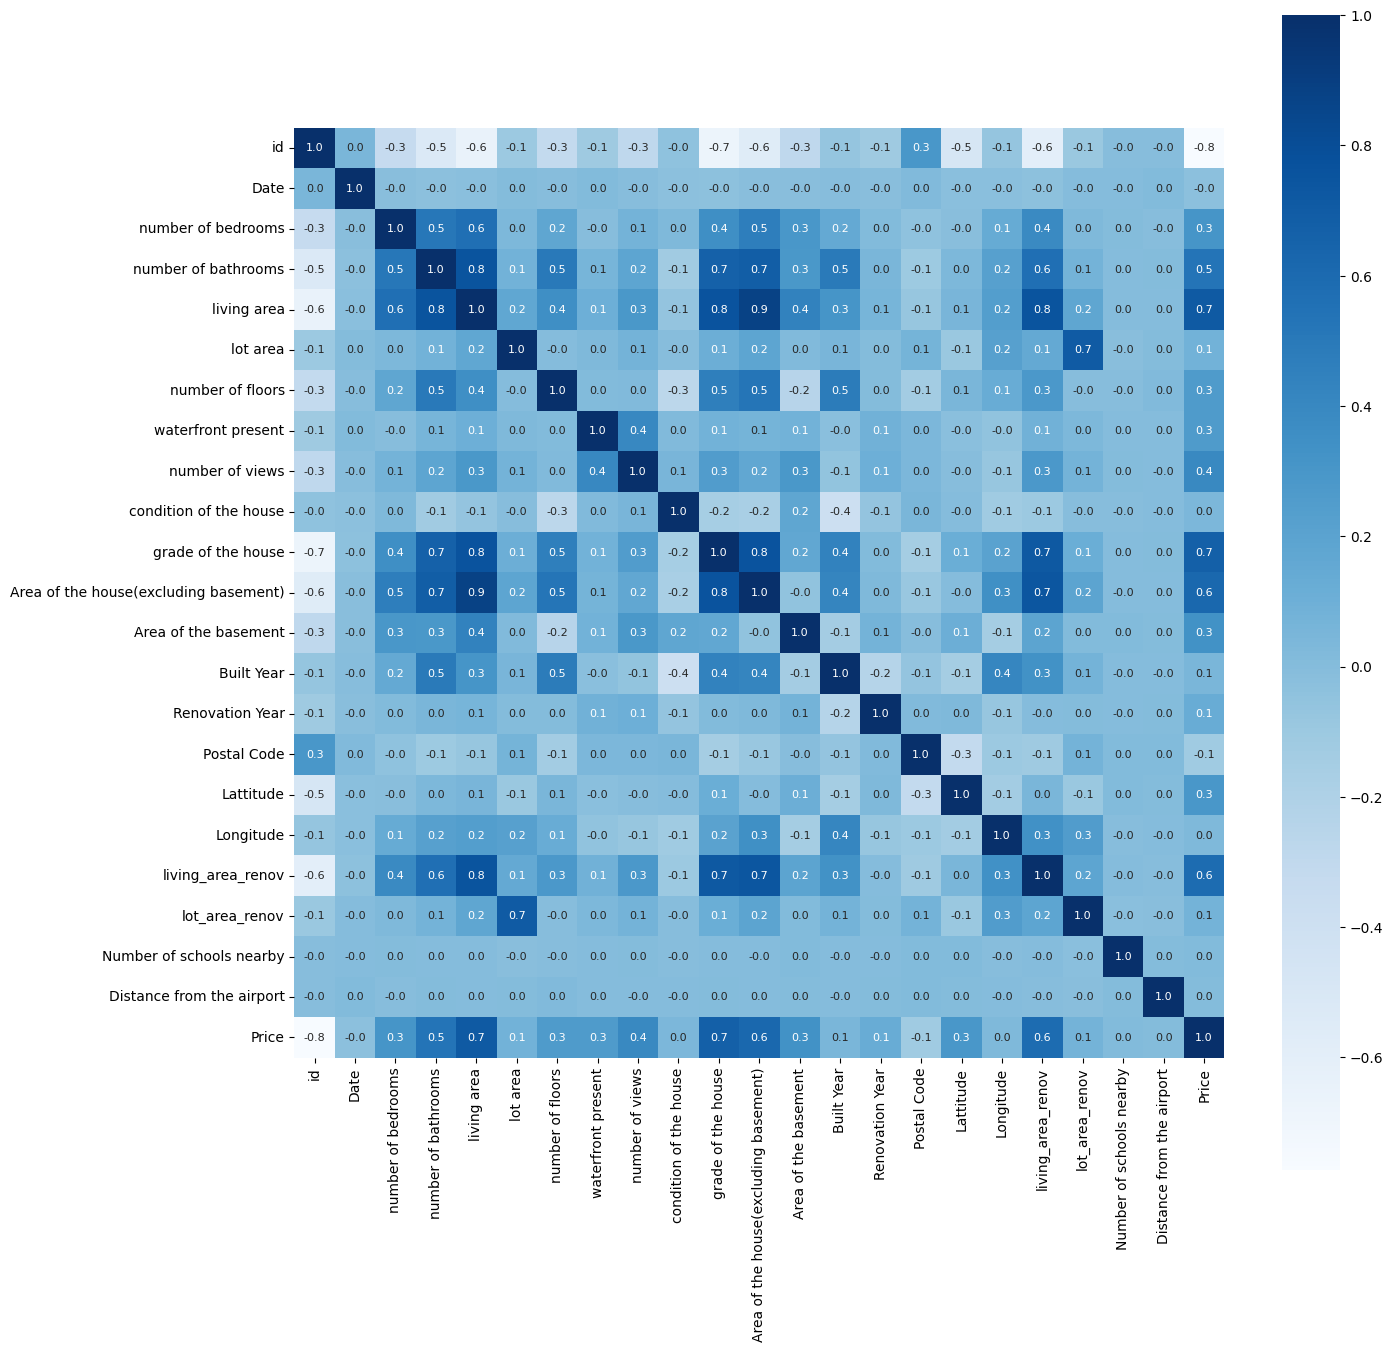

In [5]:
correlation = df.corr()  # Identyfing correlation between the features and visualizing it using a heatmap
plt.figure(figsize = (15,15))
sns.heatmap(correlation, cbar = True, square = True, fmt = '0.1f', annot = True, annot_kws = {'size': 8},cmap = "Blues")

In [6]:
df_copy = df.copy() # As we have to make changes to the dataset, copying the dataset to another object

In [7]:
df_copy.drop(columns = ['id','Date','Postal Code','Distance from the airport','Number of schools nearby'],inplace = True)
# Analyzing the heatmap, we can observe that the columns 'id', 'Date','Postal Code','Distance from the airport','Number of schools nearby' can be dropped as there is very minimal correlation to the prices

New dataset

In [8]:
df_copy 

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Lattitude,Longitude,living_area_renov,lot_area_renov,Price
0,5,2.50,3650,9050,2.0,0,4,5,10,3370,280,1921,0,52.8645,-114.557,2880,5400,2380000
1,4,2.50,2920,4000,1.5,0,0,5,8,1910,1010,1909,0,52.8878,-114.470,2470,4000,1400000
2,5,2.75,2910,9480,1.5,0,0,3,8,2910,0,1939,0,52.8852,-114.468,2940,6600,1200000
3,4,2.50,3310,42998,2.0,0,0,3,9,3310,0,2001,0,52.9532,-114.321,3350,42847,838000
4,3,2.00,2710,4500,1.5,0,0,4,8,1880,830,1929,0,52.9047,-114.485,2060,4500,805000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,2,1.50,1556,20000,1.0,0,0,4,7,1556,0,1957,0,52.6191,-114.472,2250,17286,221700
14616,3,2.00,1680,7000,1.5,0,0,4,7,1680,0,1968,0,52.5075,-114.393,1540,7480,219200
14617,2,1.00,1070,6120,1.0,0,0,3,6,1070,0,1962,0,52.7289,-114.507,1130,6120,209000
14618,4,1.00,1030,6621,1.0,0,0,4,6,1030,0,1955,0,52.7157,-114.411,1420,6631,205000


In [9]:
df_copy.info() #Information of new dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   number of bedrooms                     14620 non-null  int64  
 1   number of bathrooms                    14620 non-null  float64
 2   living area                            14620 non-null  int64  
 3   lot area                               14620 non-null  int64  
 4   number of floors                       14620 non-null  float64
 5   waterfront present                     14620 non-null  int64  
 6   number of views                        14620 non-null  int64  
 7   condition of the house                 14620 non-null  int64  
 8   grade of the house                     14620 non-null  int64  
 9   Area of the house(excluding basement)  14620 non-null  int64  
 10  Area of the basement                   14620 non-null  int64  
 11  Bu

The columns 'number of bathrooms', 'waterfront present', 'number of floors' can be converted to integers

In [11]:
df_copy = df_copy.astype({'number of bathrooms' : 'int', 'waterfront present': 'int', 'number of floors': 'int'})
df_copy

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Lattitude,Longitude,living_area_renov,lot_area_renov,Price
0,5,2,3650,9050,2,0,4,5,10,3370,280,1921,0,52.8645,-114.557,2880,5400,2380000
1,4,2,2920,4000,1,0,0,5,8,1910,1010,1909,0,52.8878,-114.470,2470,4000,1400000
2,5,2,2910,9480,1,0,0,3,8,2910,0,1939,0,52.8852,-114.468,2940,6600,1200000
3,4,2,3310,42998,2,0,0,3,9,3310,0,2001,0,52.9532,-114.321,3350,42847,838000
4,3,2,2710,4500,1,0,0,4,8,1880,830,1929,0,52.9047,-114.485,2060,4500,805000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,2,1,1556,20000,1,0,0,4,7,1556,0,1957,0,52.6191,-114.472,2250,17286,221700
14616,3,2,1680,7000,1,0,0,4,7,1680,0,1968,0,52.5075,-114.393,1540,7480,219200
14617,2,1,1070,6120,1,0,0,3,6,1070,0,1962,0,52.7289,-114.507,1130,6120,209000
14618,4,1,1030,6621,1,0,0,4,6,1030,0,1955,0,52.7157,-114.411,1420,6631,205000


In [12]:
df_copy.info()  # Converted from float to integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   number of bedrooms                     14620 non-null  int64  
 1   number of bathrooms                    14620 non-null  int32  
 2   living area                            14620 non-null  int64  
 3   lot area                               14620 non-null  int64  
 4   number of floors                       14620 non-null  int32  
 5   waterfront present                     14620 non-null  int32  
 6   number of views                        14620 non-null  int64  
 7   condition of the house                 14620 non-null  int64  
 8   grade of the house                     14620 non-null  int64  
 9   Area of the house(excluding basement)  14620 non-null  int64  
 10  Area of the basement                   14620 non-null  int64  
 11  Bu

<AxesSubplot: >

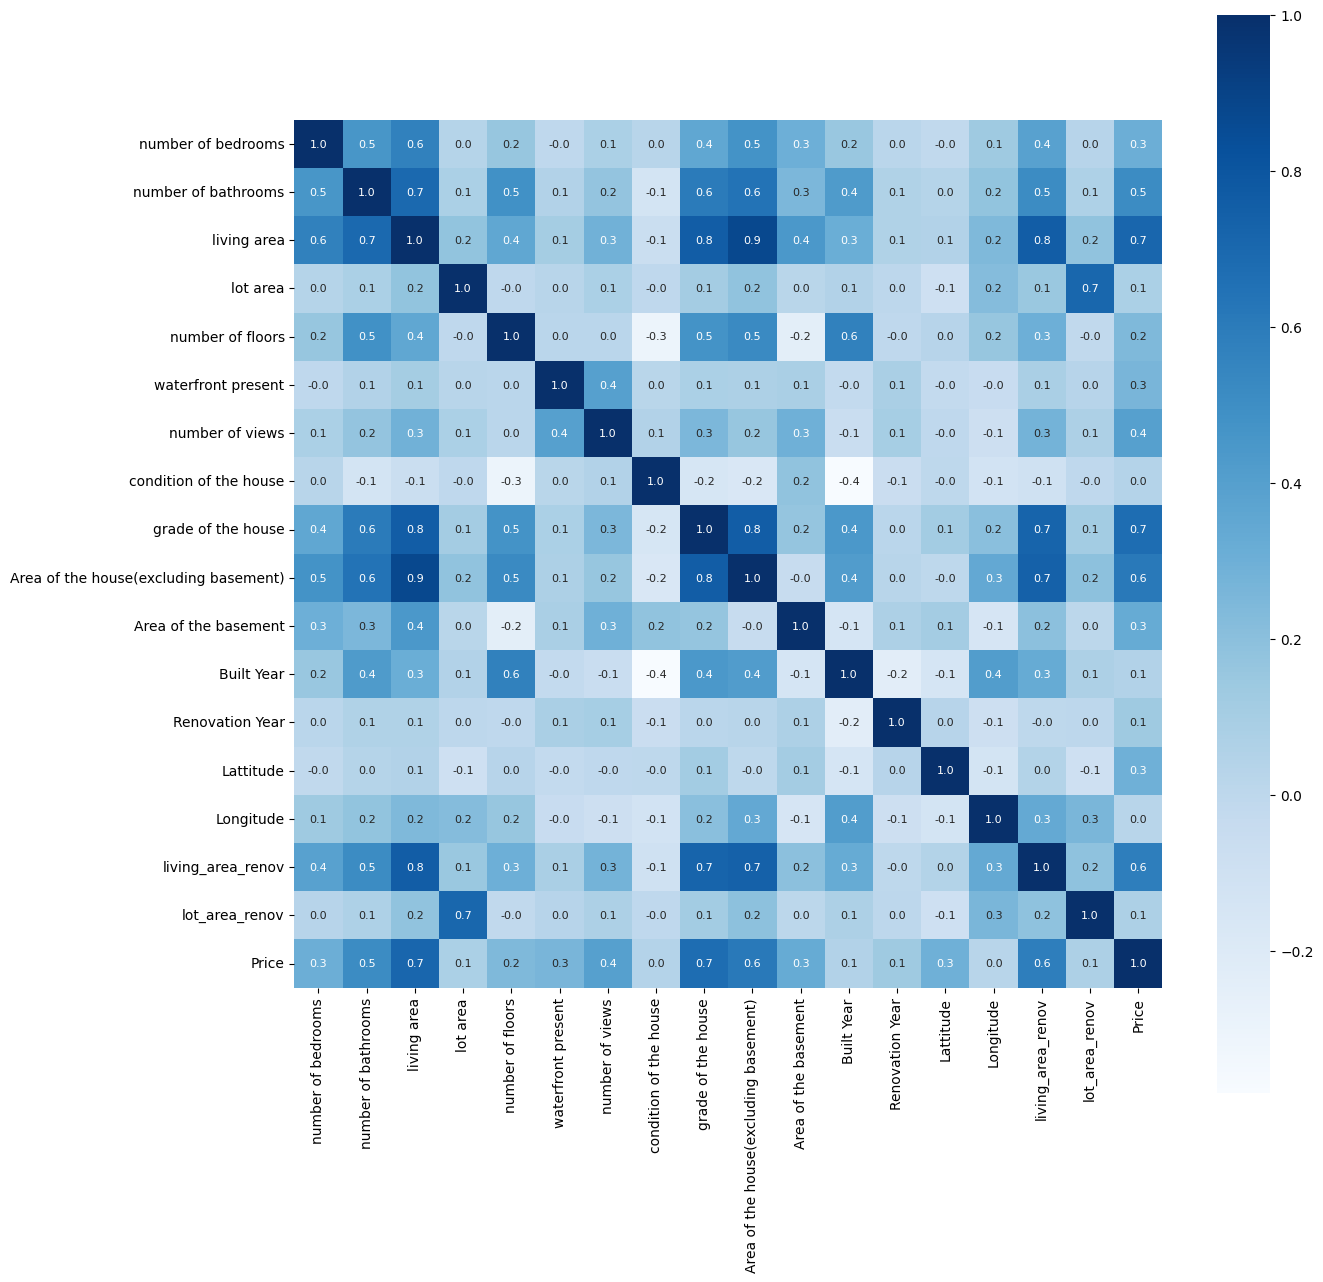

In [13]:
correlation = df_copy.corr() # Plotting the correlation heatmap
plt.figure(figsize = (14,14))
sns.heatmap(correlation, cbar = True, square = True, fmt = '0.1f', annot = True, annot_kws = {'size': 8},cmap = "Blues")

In [14]:
df_copy.isnull().sum() # Checking for any NULL values

number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Price                                    0
dtype: int64

### Scatter plot to better analyze the correlation between number of bedrooms and price

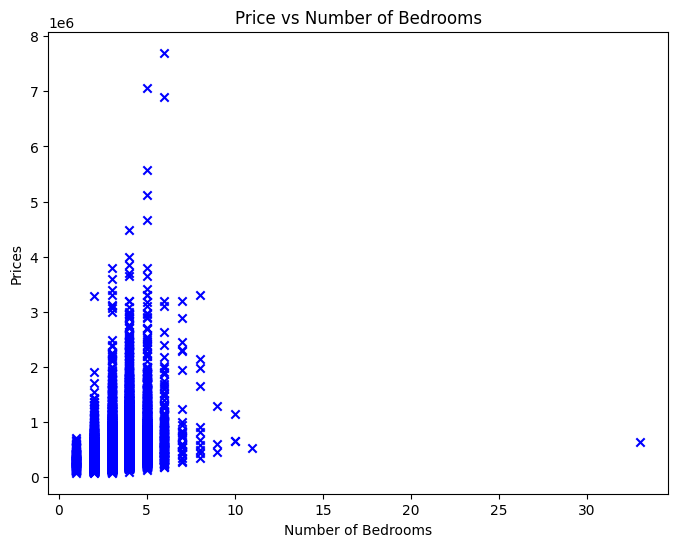

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(df_copy["number of bedrooms"], df_copy["Price"], color='blue', marker='x')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Prices')
plt.title('Price vs Number of Bedrooms')
plt.show()

## We can oobserve that there is an outlier which may affect the model.
## To remove that we will use z-score normalization for the column number of bedrooms

In [16]:
mean_bedrooms = df_copy['number of bedrooms'].mean()
std_dev_bedrooms = df_copy['number of bedrooms'].std()
df_copy['Z_Score'] = (df_copy['number of bedrooms'] - mean_bedrooms) / std_dev_bedrooms
df_copy = df_copy[(df_copy['Z_Score'] <= 2) & (df_copy['Z_Score'] >= -2)]
df_copy = df_copy.drop(columns=['Z_Score'])
df_copy

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Lattitude,Longitude,living_area_renov,lot_area_renov,Price
0,5,2,3650,9050,2,0,4,5,10,3370,280,1921,0,52.8645,-114.557,2880,5400,2380000
1,4,2,2920,4000,1,0,0,5,8,1910,1010,1909,0,52.8878,-114.470,2470,4000,1400000
2,5,2,2910,9480,1,0,0,3,8,2910,0,1939,0,52.8852,-114.468,2940,6600,1200000
3,4,2,3310,42998,2,0,0,3,9,3310,0,2001,0,52.9532,-114.321,3350,42847,838000
4,3,2,2710,4500,1,0,0,4,8,1880,830,1929,0,52.9047,-114.485,2060,4500,805000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,2,1,1556,20000,1,0,0,4,7,1556,0,1957,0,52.6191,-114.472,2250,17286,221700
14616,3,2,1680,7000,1,0,0,4,7,1680,0,1968,0,52.5075,-114.393,1540,7480,219200
14617,2,1,1070,6120,1,0,0,3,6,1070,0,1962,0,52.7289,-114.507,1130,6120,209000
14618,4,1,1030,6621,1,0,0,4,6,1030,0,1955,0,52.7157,-114.411,1420,6631,205000


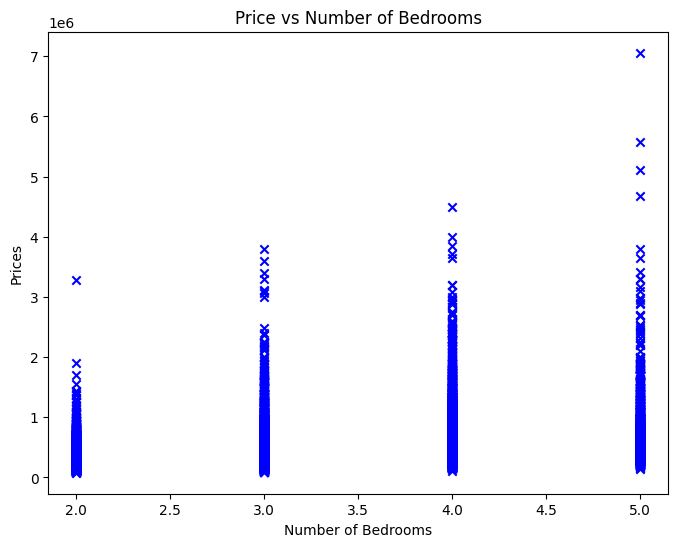

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(df_copy["number of bedrooms"], df_copy["Price"], color='blue', marker='x')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Prices')
plt.title('Price vs Number of Bedrooms')
plt.show()

## Now we can see the outliers are removed and the number of training points(rows) are reduced from 14620 to 14259

### X contains the input variables, and Y contains the target variable

In [20]:
X = df_copy.drop(['Price'], axis = 1)
Y = df_copy['Price']
print(X)
Y

       number of bedrooms  number of bathrooms  living area  lot area  \
0                       5                    2         3650      9050   
1                       4                    2         2920      4000   
2                       5                    2         2910      9480   
3                       4                    2         3310     42998   
4                       3                    2         2710      4500   
...                   ...                  ...          ...       ...   
14615                   2                    1         1556     20000   
14616                   3                    2         1680      7000   
14617                   2                    1         1070      6120   
14618                   4                    1         1030      6621   
14619                   3                    1          900      4770   

       number of floors  waterfront present  number of views  \
0                     2                   0                

0        2380000
1        1400000
2        1200000
3         838000
4         805000
          ...   
14615     221700
14616     219200
14617     209000
14618     205000
14619     146000
Name: Price, Length: 14259, dtype: int64

## This code snippet splits the dataset into a training dataset and test dataset, 25% of the dataset will be used to test the data while the rest of it will be used for training.

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)
print(X.shape, X_train.shape, X_test.shape)

(14259, 17) (10694, 17) (3565, 17)


## First, we will train the dataset by Linear regression

In [22]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

## The slope and intercept of the model

In [23]:
c = lr.intercept_
c

-36639499.90487447

In [24]:
m = lr.coef_
m

array([-3.80867722e+04,  4.69147128e+04,  1.06896561e+02,  4.30317214e-02,
       -6.80022872e+03,  6.15383772e+05,  5.00423956e+04,  3.45716296e+04,
        1.00039040e+05,  7.13905600e+01,  3.55060005e+01, -2.24456012e+03,
        2.84442826e+01,  5.31415901e+05, -1.07418325e+05,  2.44345278e+01,
       -3.52989696e-01])

In [25]:
training_data_prediction_lr = lr.predict(X_train) # Predicting the values

In [26]:
training_data_prediction_lr

array([ 468133.8583651 ,  740570.90287278, 1275153.68588299, ...,
        504627.06661086,  272091.52339909,  445536.89833496])

In [27]:
linear_regression_r2 = r2_score(Y_train, training_data_prediction_lr)

In [28]:
linear_regression_r2 #R-square method for evaluating the accuracy

0.7158621702878993

In [29]:
linear_regression_mean = mean_absolute_error(Y_train, training_data_prediction_lr)
linear_regression_mean #Mean absolute error

120098.79188835365

In [30]:
model = XGBRegressor() # XGB regression

In [31]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [32]:
training_data_prediction_xgb = model.predict(X_train)
training_data_prediction_xgb

array([ 336025.1 ,  679303.7 , 2608231.5 , ...,  511302.75,  363009.7 ,
        517140.66], dtype=float32)

In [33]:
xgb_r2 = r2_score(Y_train, training_data_prediction_xgb)
xgb_r2 # R-square method for evaluating the accuracy

0.9828000970625065

In [34]:
xgb_mean = mean_absolute_error(Y_train, training_data_prediction_xgb)
xgb_mean

33737.93203256499

In [35]:
test_data_prediction_xgb = model.predict(X_test)
test_data_prediction_xgb

array([1719557.8 ,  613614.25,  299827.38, ...,  508311.56,  522060.84,
        516399.84], dtype=float32)

In [36]:
xgb_test_r2 = r2_score(Y_test, test_data_prediction_xgb)
xgb_test_r2 # Predicting the test values

0.8886260510909183

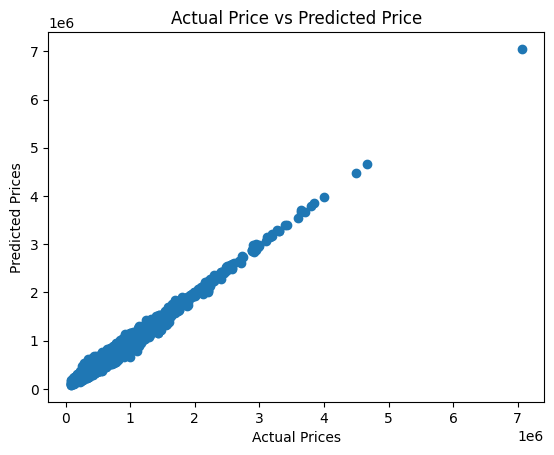

In [37]:
plt.scatter(Y_train, training_data_prediction_xgb)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show() # Plotting the graph

# The graph is a roughly a straight line with no major outliers skewing the model. This model is highly accurate to predict the House prices.

## Thank you